# Backpropagation

Build an Artificial Neural Network by implementing the Backpropagation algorithm and test the same using appropriate data sets.

In [40]:
import numpy as np

In [41]:
import matplotlib.pyplot as plt

In [55]:
# Initialize Model Parameters
epoch=1000       # Number of times we iterate over the training data during the train process 
input_layer = 2  # No of neurons in the input layer
hidden_layer = 3 # No of neurons in the hidden layer
output_layer = 1 # No of neurons in the output layer

In [56]:
# Initialize weights and biases

# Hidden Layer
wh = np.random.uniform(size=(input_layer,hidden_layer))
bh = np.random.uniform(size=(1,hidden_layer))

# Output Layer
wo = np.random.uniform(size=(hidden_layer,output_layer))
bo = np.random.uniform(size=(1,output_layer))

In [57]:
# Initialize a dataset , x is the input data and y is the target values we need to predict
x = np.array(([2, 9], [1, 5], [3, 6]), dtype=float) 
y = np.array(([92], [86], [89]), dtype=float) 
print("X = ",x)
print("Y = ",y)

X =  [[2. 9.]
 [1. 5.]
 [3. 6.]]
Y =  [[92.]
 [86.]
 [89.]]


In [58]:
# We normalize the values of y by scaling them wrt the max value in y
y = y / np.max(y)
print(y)

[[1.        ]
 [0.93478261]
 [0.9673913 ]]


In [59]:
# In this network we will be using sigmoid as out activation function in the neurons
def sigmoid(x):
    return 1/(1+np.exp(-x))

# We will also define a function to get the derivate of sigmoid , useful during back prop
def sigmoid_grad(x):
    return x*(1-x)

In [60]:
# Learning rate , tells up how big the weight updates need to be on each iteration over training data
lr = 0.01

In [61]:
print(f"wo {wo.shape} , wh {wh.shape} , bo {bo.shape} , bh {bh.shape}")

wo (3, 1) , wh (2, 3) , bo (1, 1) , bh (1, 3)


In [62]:
# A log off error over epoch is stored in this list
loss=[]

# Loop epoch number of times
for i in range(epoch):
    
    # forward propogation
    
    z1 = np.dot(x,wh) + bh # Linear combination
    a1 = sigmoid(z1)       # Activation function
    
    #print(f"z1 = {z1.shape} <= x shape = {x.shape} dot wh = {wh.shape}")
    
    z2 = np.dot(a1,wo) + bo # Linear combination
    a2 = sigmoid(z2)        # Activation function
    
    #print(f"z2 = {z2.shape} <= a1 shape = {a1.shape} dot wo = {wo.shape}")
    
    # Calculate Error
    error = y - a2   # How far away is the target value y from the predicted value a2
    
    # log the error to loss list
    loss.append(np.sum(error))
    
    #print(f"error = {error.shape} <= y={y.shape} - a2 = {a2.shape}")
    
    # Backprop Error
    
    # use the error value to calc d_a2, d_a2 tells us the gradient of a2 while moving in backward direction  
    d_a2 = error * sigmoid_grad(a2)
    
    #print(f"d_a2 = {d_a2.shape} <= sigmoid_grad(error) = {sigmoid_grad(error).shape} * error = {error.shape}")

    # Calculate error at hidden layer
    error_h = np.dot(d_a2,wo.T)  # Think of this like linear combination in forward prop , but in reverse direction, hence d_a2 instead of z2
    
    #print(f"error_h = {error_h.shape} <= d_a2.T = {d_a2.shape} dot wo = {wo.T.shape} ")

    # Calculate derivate of a1, d_a1 = error_at_hidden_layer dot activation_grad_of current_layer_output
    d_a1 = np.dot(error_h.T,sigmoid_grad(a1))
 
    
    # Update Weight
    
    # delta_weight = learning_rate * dot_product( prev_layer_activation , current_activation_derivative )
    
    #print(f"d_wo = {wo.shape} <= a1.T shape = {a1.T.shape} dot d_a2 = {d_a2.shape} , ")
    d_wo = lr * np.dot(a1.T,d_a2) # For output layer weight
    
    #print(f"d_wh = {wh.shape} <=  x shape.T = {x.T.shape} dot d_a1 = {d_a1.shape} ")
    # For hidden layer weight
    d_wh = lr * np.dot(x.T , d_a1) # for input layer the prev_activation will be the training data itself
    
    # new weight += delta_weight , new_bias += sum(derivative of current layer activation)
    wo += d_wo
    bo += np.sum(d_a2,axis=0,keepdims=True)
    wh += d_wh
    bh += np.sum(d_a1,axis=0,keepdims=True)

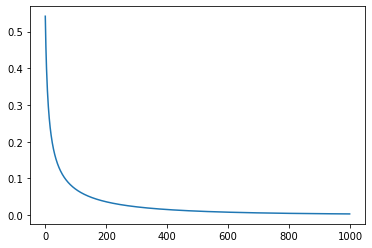

In [63]:
# you should see the curve slope downwards as epoch incr, this shows the networks error is getting smaller
# i.e - predicted values are moving closer to expected values
plt.plot(loss)

In [27]:
# Simple function to make a prediction. Making prediction is same as making a forward pass.
# The a2 value is the predicted ouput from the network.
def predict(x):
    z1 = np.dot(x,wh) + bh
    a1 = sigmoid(z1)
    #print(f"z1 = {z1.shape} <= x shape = {x.shape} dot wh = {wh.shape}")
    
    z2 = np.dot(a1,wo) + bo
    a2 = sigmoid(z2)
    #print(f"z2 = {z2.shape} <= a1 shape = {a1.shape} dot wo = {wo.shape}")
    
    return a2

In [64]:
# Predict on the last training data
predict(x[-1])

array([[0.9663315]])

In [66]:
# The expected value. You should see that this value and the one above is close
y[-1]

array([0.9673913])

In [67]:
import matplotlib.pyplot as plt

In [68]:
# make predictions for multiple values
preds = []
for s in x:
    preds.append(predict(s))

In [69]:
preds

[array([[0.96716406]]), array([[0.96541215]]), array([[0.9663315]])]

In [70]:
y

array([[1.        ],
       [0.93478261],
       [0.9673913 ]])

# END